In [10]:
import sys
sys.path.append('e:\solar flares\data\\2017-09-06')
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
from importlib import reload


In [2]:
reload(un)
import voight_fit as vf
reload(un2)
reload(vf)

lines = ["Ha14"]
long_names = {"Ha14":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}


data = un.load_for_further_analysis(lines)

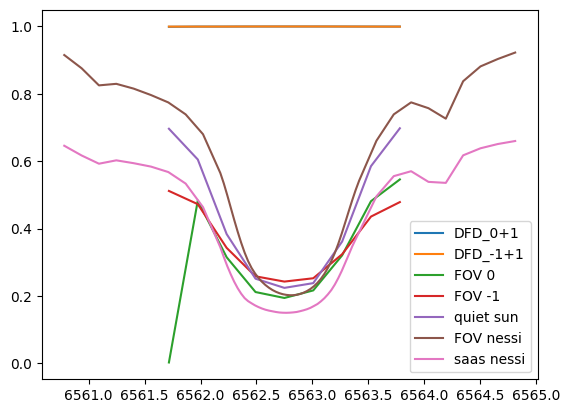

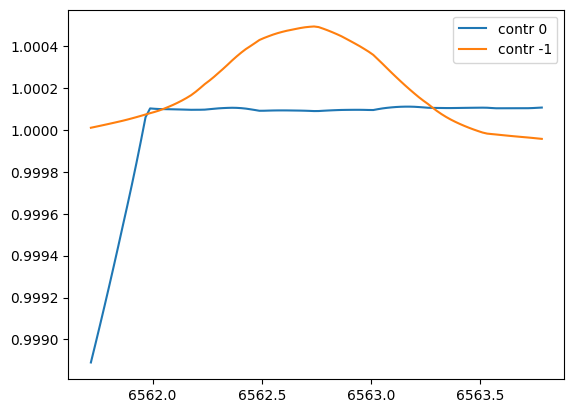

In [3]:
un2.test_contrast(data, "Ha14")

The average is 1.0000717689469825
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
At frame 0 the voight fitting was not succesfull and initial guess ([5.55265545e-03 6.56293638e+03 5.29257897e-01 4.96399919e-01]) is used as params and as std of params. 
At frame 3 the voight fitting was not succesfull and previous params are used. 
At frame 5 the voight fitting was not succesfull and previous params are used. 
At frame 6 the voight fitting was not succesfull and previous params are used. 
At frame 32 the voight fitting was not succesfull and previous params are used. 


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


param_fit[-1] = (array([ 1.72074390e-05,  6.56272290e+03,  6.18621963e-01, -3.80437183e-05]), array([inf, inf, inf, inf])). Here comes the plot:


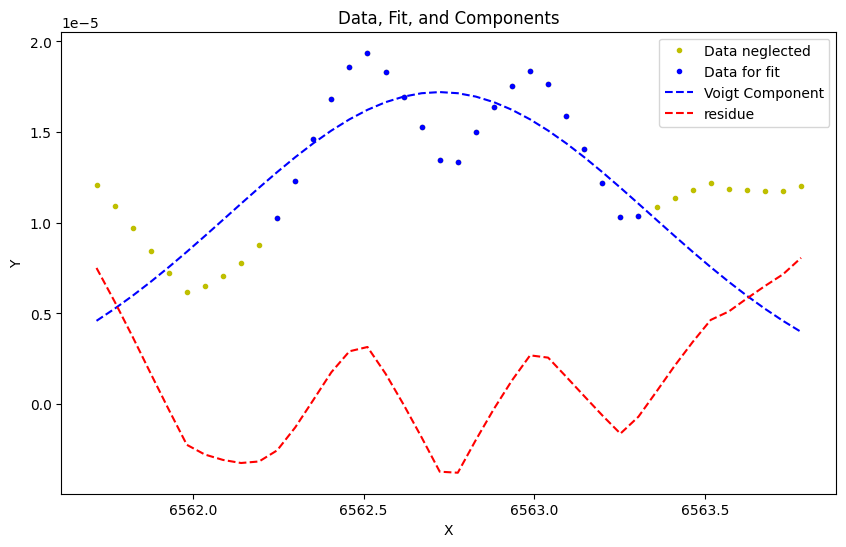

param_fit[-1] = (array([2.44530987e-05, 6.56238931e+03, 2.75651847e-01, 1.99616431e-01]), array([1.40634567e-06, 2.61526422e-02, 4.47020206e-02, 1.72521466e-01])). Here comes the plot:


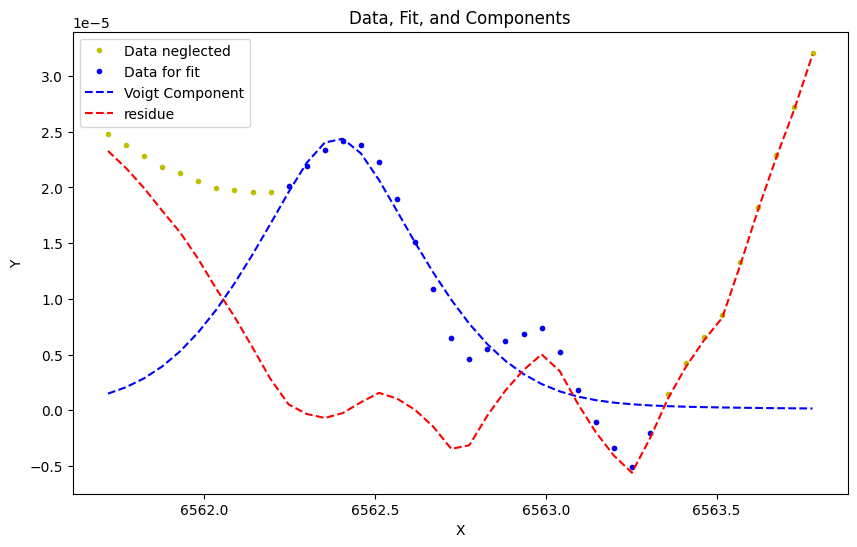

param_fit[-1] = (array([7.23686070e-05, 6.56267079e+03, 4.23085534e-01, 5.20603776e-01]), array([2.64755155e-06, 1.80543831e-02, 1.13248651e+00, 1.16429522e+00])). Here comes the plot:


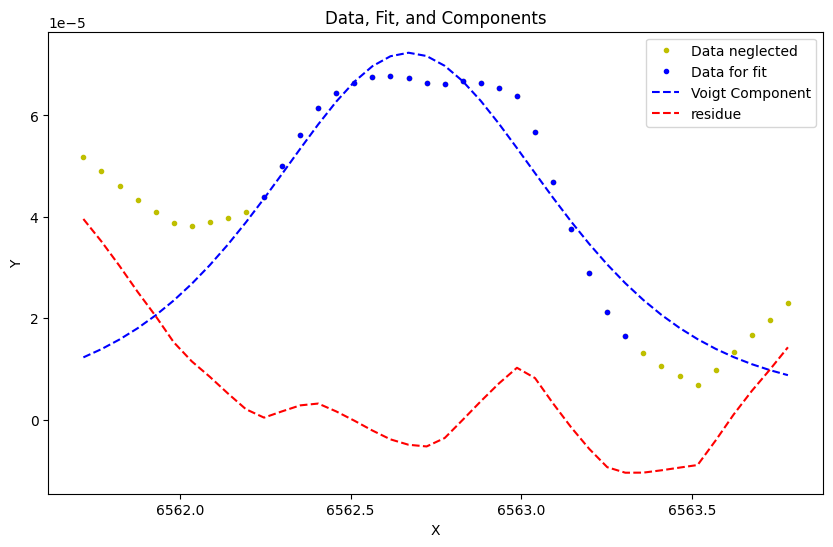

param_fit[-1] = (array([ 1.59530582e-04,  6.56273139e+03,  3.80842752e-01, -4.73308521e-01]), array([3.77139516e-06, 1.00702105e-02, 6.56740696e-01, 6.61936904e-01])). Here comes the plot:


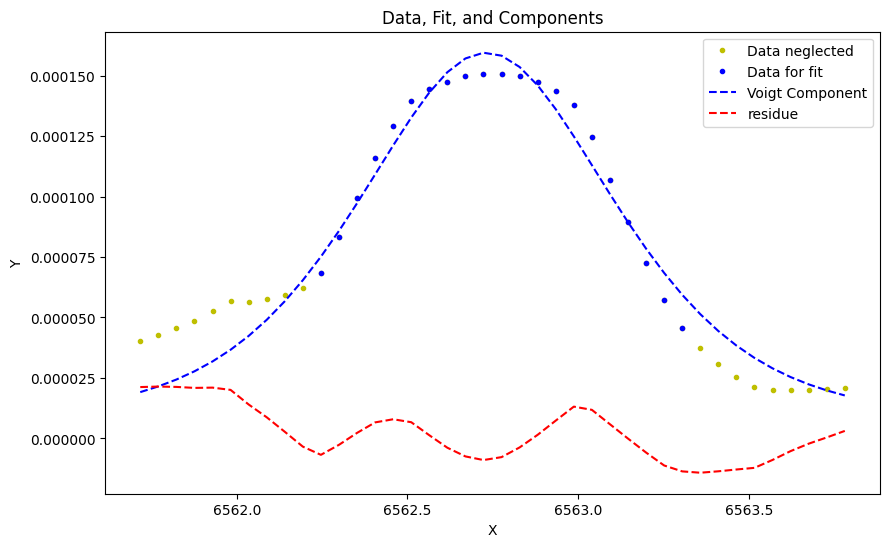

param_fit[-1] = (array([ 2.75671919e-04,  6.56271084e+03,  3.87126874e-01, -4.69885488e-01]), array([6.56393657e-06, 9.98458830e-03, 5.56831887e-01, 5.95095009e-01])). Here comes the plot:


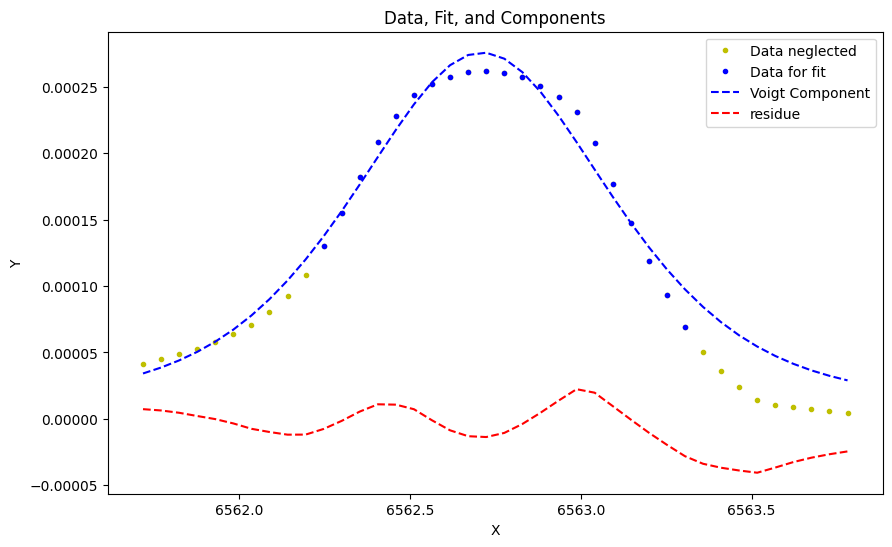

param_fit[-1] = (array([ 3.50479668e-04,  6.56271328e+03,  3.63231297e-01, -2.04322816e-04]), array([7.51585548e-05, 4.06374680e-03, 5.15542840e-03, 1.27270359e+02])). Here comes the plot:


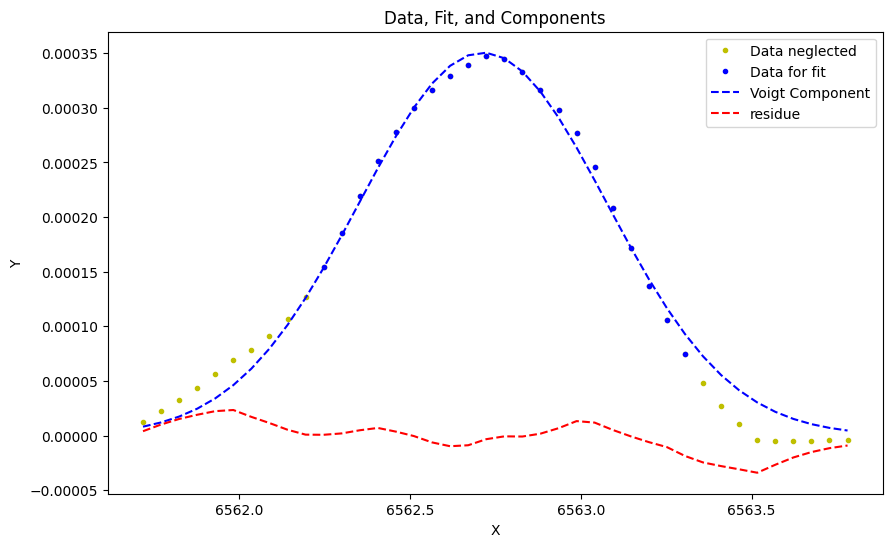

vmax = 3.3043434257993384e-05, vmin = -3.676757670463717e-05


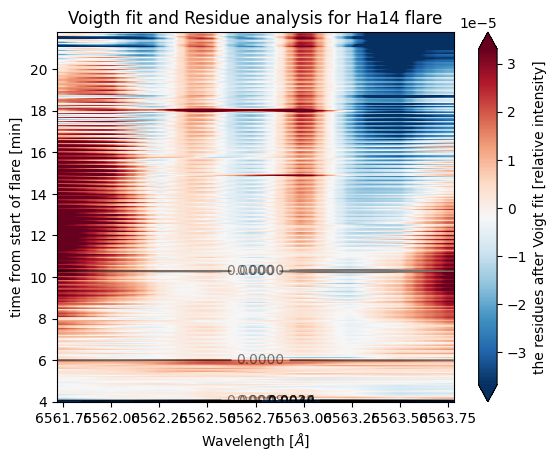

In [8]:


off = -1.0
lnp = [0,1,2,3,4,5,6,7,8,9,-9,-8,-7,-6,-5,-4,-3,-2,-1]

vf.make_analysis('Ha14', data,[5.55265545e-03, 6.56293638e+03, 5.29257897e-01, 4.96399919e-01], 
              plot_rate=40, offset=off, neglect_points=lnp)

In [22]:
def save_voight_fits(name, params, res):
    fname = f"fit_data/voight_data_{name}.npz"
    np.savez(fname, params, res)
    
def load_voight_fits(name):
    fname = f"fit_data/voight_data_{name}.npz"
    arr = np.load(fname)
    print(arr)
    param = arr['arr_0']
    res = arr['arr_1']
    return param, res

def smooth_voight_param_in_time(param):
    pass

from scipy.signal import savgol_filter

def smooth(data):
    windowlength = 5
    return savgol_filter(data, windowlength, 3, axis = 0)


def create_gaussian_kernel(n, m, sigma):
    """
  Creates a 2D Gaussian distribution over an n x m matrix.

  Args:
      n: Number of rows in the matrix.
      m: Number of columns in the matrix.
      sigma: Standard deviation of the Gaussian distribution.

  Returns:
      A numpy array representing the Gaussian distribution.
  """
    x, y = np.meshgrid(np.arange(m), np.arange(n))
    mu_x = m // 2
    mu_y = n // 2
    return np.exp(-((x - mu_x) ** 2 + (y - mu_y) ** 2) / (2 * sigma**2))

def smooth2(data, n_wav=500, n_time=1, mode='same'):
    """
    Smooths a NumPy array by averaging over n neighbors.

    Args:
        data: A NumPy array of any shape.
        n: The number of neighbors to average over.

    Returns:
        A new NumPy array with the same shape as the input data,
        containing the smoothed values.
    """
    from scipy.signal import convolve2d
    
    sigma = 0.4*n_wav
    kernel = create_gaussian_kernel(n_time, n_wav, sigma)
    kernel /= np.sum(kernel)
    sum_kernel = np.sum(kernel)
    return convolve2d(data, kernel, mode=mode)

In [23]:
param, res = load_voight_fits('Ha14')

NpzFile 'fit_data/voight_data_Ha14.npz' with keys: arr_0, arr_1


In [24]:
param = smooth(param)
res = smooth(res)

NameError: name 'wav' is not defined

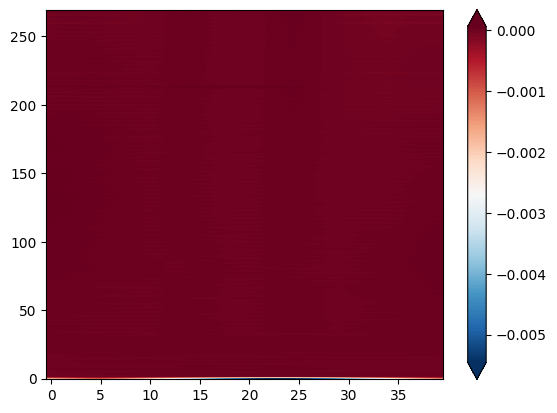

In [25]:
fig, ax = plt.subplots(1,1) 
c = ax.imshow(np.array(res), aspect="auto", cmap='RdBu_r', origin='lower')
cb = fig.colorbar(c, ax=ax, extend='both')
X, Y = np.meshgrid(wav, time)
CS = ax.contour(X, Y, voight, colors='black', alpha=0.5)
ax.clabel(CS, inline=True, fontsize=10) 